# Case study: Expanding our candy brand

**Scenario**:

The Lidl purchasing group wants to expand our candy offering. These are store brand candies that we sell along the brand offerings. The idea is to create a brand-new product. The team is discussing various options now.
Some prefer cookie-based sweets while others think that it should be gummies. The Divisional Director responsible for purchasing has decided to use a more data-driven approach. He contracted with a market research group to collect data on products in the market and their characteristics and customer sentiment.

The market research data is now available, and it is your job to find out which product characteristics drive customer sentiment and subsequently make a recommendation on a new product.

**Data**:

The data set is located (incl. a short description) here:
https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking
The data set is provided by FiveThirtyEight under the Creative Commons Attribution 4.0 International license (https://creativecommons.org/licenses/by/4.0/)

**Deliverables**:
 
Presentation and source code.



## Data exploration

In [236]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [237]:
#load candy dataset
df = pd.read_csv('candy_data.txt')

#rescale winpercent to <0,1>
df['winpercent'] = df['winpercent']*0.01


In [238]:
#check the basic data stats (dimensions, NaNs, characteristics)
print(60*'*',
    '\n',
    'Dataset dimensions: ', df.shape,
    '\n', 60*'-', '\n',
    'Columns and number of missing values: ', 
    '\n',
    df.isna().sum(),
    '\n', 60*'*')
    
df.describe()

************************************************************ 
 Dataset dimensions:  (85, 13) 
 ------------------------------------------------------------ 
 Columns and number of missing values:  
 competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64 
 ************************************************************


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,0.503168
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,0.147144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,0.224453
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,0.391411
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,0.478298
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,0.598640
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,0.841803


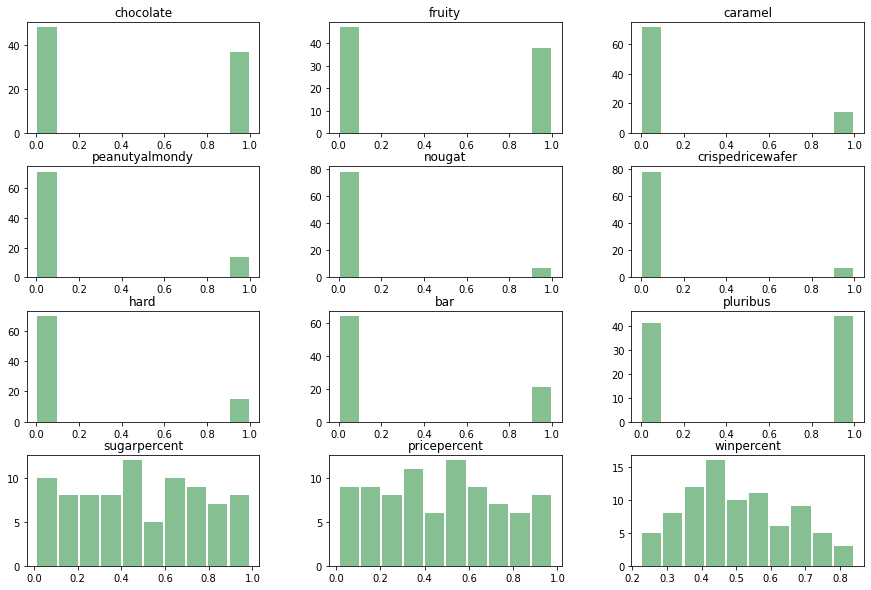

In [239]:
# the histograms
p = df.hist(figsize=(15,10), grid=False, color='#86bf91',rwidth=0.9)


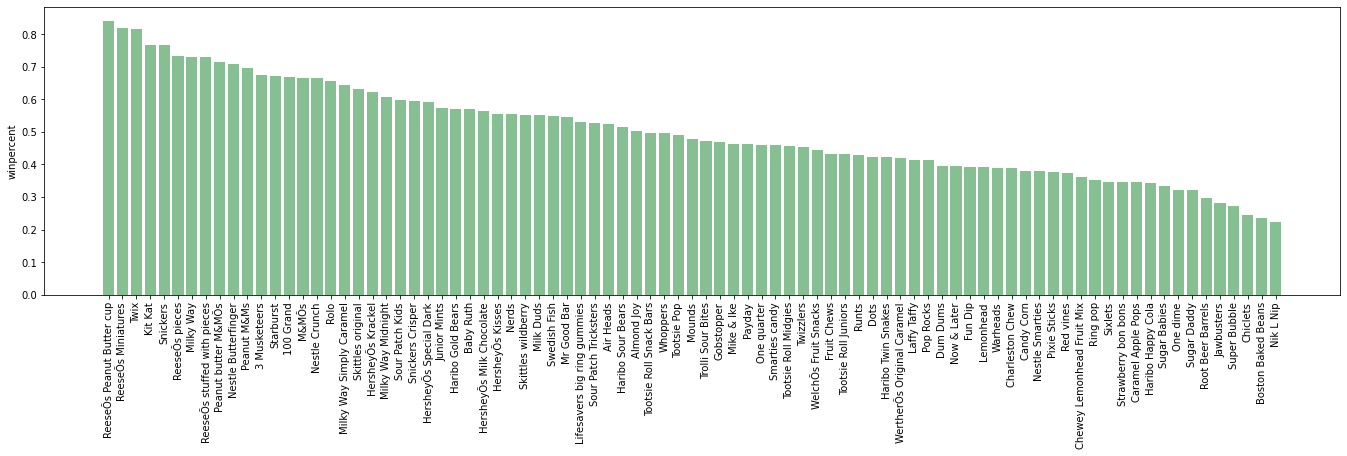

In [240]:
#show the winners
fig = plt.figure(figsize=(18,4))
ax = fig.add_axes([0,0,1,1])
company = df.sort_values(by='winpercent', ascending = False)['competitorname']
rating = df.sort_values(by='winpercent', ascending = False)['winpercent']
ax.bar(company,rating, color = '#86bf91')
plt.xticks(rotation=90)
plt.ylabel('winpercent')

plt.show()

Text(0.5, 0, 'pricepercent')

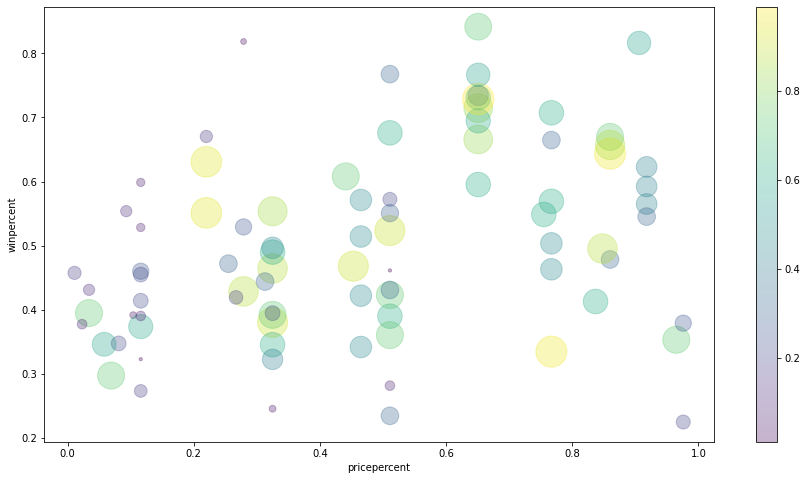

In [241]:
#colored scatter plot of continuous variables
fig = plt.figure(figsize=(15,8))
x = df['pricepercent']
y = df['winpercent']
colors = df['sugarpercent']
sizes = 1000 * df['sugarpercent']
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.ylabel('winpercent')
plt.xlabel('pricepercent')

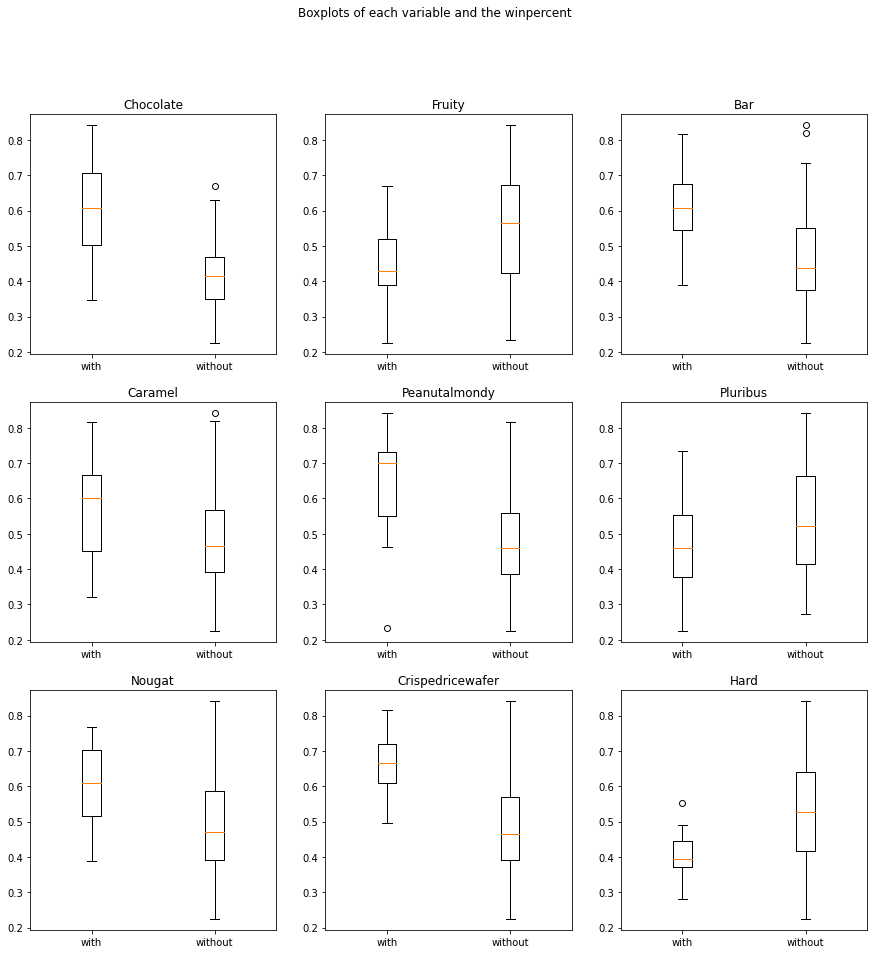

In [242]:
#boxplots:
fig, axs = plt.subplots(3,3)
fig.suptitle('Boxplots of each variable and the winpercent')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.xticks([1, 2], [0, 1])

#chocolate 
axs[0,0].boxplot([df['winpercent'][df['chocolate']==1],df['winpercent'][df['chocolate']==0]])
axs[0,0].set_title('Chocolate')

#fruity
axs[0,1].boxplot([df['winpercent'][df['fruity']==1],df['winpercent'][df['fruity']==0]])
axs[0,1].set_title('Fruity')

#Caramel
axs[1,0].boxplot([df['winpercent'][df['caramel']==1],df['winpercent'][df['caramel']==0]])
axs[1,0].set_title('Caramel')

#Peanutalmondy
axs[1,1].boxplot([df['winpercent'][df['peanutyalmondy']==1],df['winpercent'][df['peanutyalmondy']==0]])
axs[1,1].set_title('Peanutalmondy')

#Nougat
axs[2,0].boxplot([df['winpercent'][df['nougat']==1],df['winpercent'][df['nougat']==0]])
axs[2,0].set_title('Nougat')

#Crispedricewafer
axs[2,1].boxplot([df['winpercent'][df['crispedricewafer']==1],df['winpercent'][df['crispedricewafer']==0]])
axs[2,1].set_title('Crispedricewafer')

#Bar
axs[0,2].boxplot([df['winpercent'][df['bar']==1],df['winpercent'][df['bar']==0]])
axs[0,2].set_title('Bar')

#Pluribus
axs[1,2].boxplot([df['winpercent'][df['pluribus']==1],df['winpercent'][df['pluribus']==0]])
axs[1,2].set_title('Pluribus')

#Hard
axs[2,2].boxplot([df['winpercent'][df['hard']==1],df['winpercent'][df['hard']==0]])
axs[2,2].set_title('Hard')

for a in range(3):
    for b in range(3):
        axs[a,b].set_xticks([1,2])
        axs[a,b].set_xticklabels(['with','without'])

plt.show()

Text(0, 0.5, 'pricepercent')

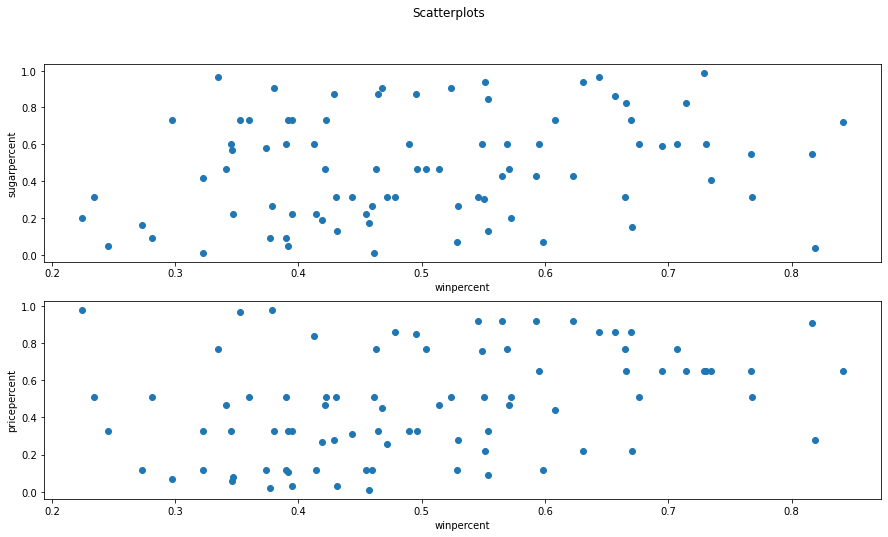

In [243]:
#scatter plots of the continuous variables
fig, axs = plt.subplots(2)
fig.suptitle('Scatterplots')
fig.set_figheight(8)
fig.set_figwidth(15)

axs[0].scatter(df['winpercent'],df['sugarpercent'])
axs[0].set_xlabel('winpercent')
axs[0].set_ylabel('sugarpercent')

axs[1].scatter(df['winpercent'],df['pricepercent'])
axs[1].set_xlabel('winpercent')
axs[1].set_ylabel('pricepercent')

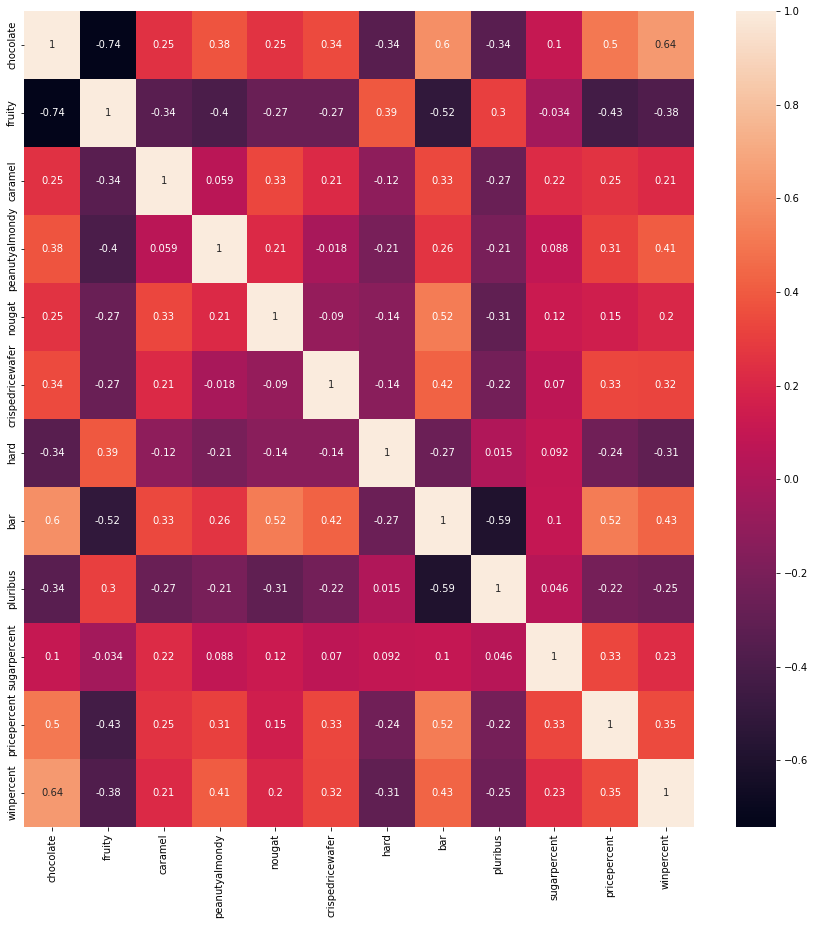

In [244]:
#correlation matrix
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(15,15))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Data discussion

* no missing values in the dataset
* from the boxplots and correlation matrix it seems, that chocolate, caramel, peanutyalmondy, nougat, crispedricewafer, bar, sugarpercent and pricepercent have positive effect on the winpercent
* on the other hand, fruitz, hard and pluribus show negative trend
* the number of observations with nougat and crispedricewafer is low (7 observations)

## Questions

1) How does the TOP10 candies look like?

* all of them include chocolate
* all of them are not fruity and hard
* the avererage sugarpercent is 0.56
* the average pricepercent is 0.64
* the median sugarpercent is 0.57
* the median pricepercent is 0.65
* both expensive and sugar-full products are in TOP10

In [283]:
s1 = df.sort_values(by='winpercent', ascending=False).head(10)
s1[['competitorname','winpercent']]

,competitorname,winpercent
52,ReeseÕs Peanut Butter cup,0.841803
51,ReeseÕs Miniatures,0.818663
79,Twix,0.816429
28,Kit Kat,0.767686
64,Snickers,0.766738
53,ReeseÕs pieces,0.734350
36,Milky Way,0.730996
54,ReeseÕs stuffed with pieces,0.728879
32,Peanut butter M&MÕs,0.714651
42,Nestle Butterfinger,0.707356


In [246]:
s1.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.0,0.0,0.300000,0.700000,0.200000,0.200000,0.0,0.500000,0.200000,0.558600,0.636900,0.762755
std,0.0,0.0,0.483046,0.483046,0.421637,0.421637,0.0,0.527046,0.421637,0.267635,0.161409,0.047890
min,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.034000,0.279000,0.707356
25%,1.0,0.0,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.441000,0.651000,0.729408
50%,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.575000,0.651000,0.750544
75%,1.0,0.0,0.750000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.691000,0.651000,0.804243
max,1.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.988000,0.906000,0.841803


2. How does the WORST10 candies look like?

* none of them include chocolate, nougat, crispedricewafer, bar
* the avererage sugarpercent is 0.34
* the average pricepercent is 0.42
* the median sugarpercent is 0.26
* the median pricepercent is 0.40
* both expensive and sugar-full products are in WORST10

In [247]:
s2 = df.sort_values(by='winpercent', ascending=True).head(10)
s2

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,0.224453
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,0.234178
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,0.245250
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,0.273039
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,0.281274
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,0.297037
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,0.322310
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0.322611
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,0.334376
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,0.341590


In [248]:
s2.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,10.0,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.0,10.000000,10.000000,10.000000,10.000000
mean,0.0,0.400000,0.200000,0.100000,0.0,0.0,0.200000,0.0,0.700000,0.340200,0.418100,0.287612
std,0.0,0.516398,0.421637,0.316228,0.0,0.0,0.421637,0.0,0.483046,0.311724,0.293291,0.042830
min,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011000,0.069000,0.224453
25%,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.250000,0.110250,0.168250,0.252197
50%,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.255000,0.395000,0.289156
75%,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.453250,0.511000,0.322536
max,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.965000,0.976000,0.341590


3. Are there candies with chocolate and at the same time fruity?

In [249]:
df[(df['chocolate']==1) & (df['fruity']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.604,0.325,0.489827


4. What are the most frequent ingredients in the TOP30?

In [250]:
#in the TOP30 observations, what are the most frequented ingredients?
count_ingredients = {}
ingredients = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
df_sorted_30 = df.sort_values(by='winpercent', ascending = False).head(30)

for ingredient in ingredients:
    count_ingredients[str(ingredient)] = df_sorted_30[ingredient].sum()

pd.DataFrame(count_ingredients,['ingredient','counts']).T.sort_values(by='counts',ascending=False)

,ingredient,counts
chocolate,25,25
bar,15,15
pluribus,12,12
peanutyalmondy,10,10
caramel,9,9
crispedricewafer,6,6
fruity,5,5
nougat,5,5
hard,1,1


## PCA (Principal Component Analysis)

According to the procedure below, 8 features are needed to keep at least 90% of the information

In [251]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df.drop(['competitorname','winpercent'], axis = 1).columns.to_list()
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x) 

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_candy = pd.DataFrame(x,columns=feat_cols)

In [252]:
pca_candy = PCA(n_components=8)
principalComponents_candy = pca_candy.fit_transform(x)
print('Explained variation per principal component: {}'.format(np.round(pca_candy.explained_variance_ratio_,2)))
print('Explained variation in total: {}'.format(sum(pca_candy.explained_variance_ratio_)))

Explained variation per principal component: [0.36 0.12 0.11 0.1  0.08 0.06 0.05 0.04]
Explained variation in total: 0.9215462217012999


## Basic linear regression - treshold model

In [253]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = df.drop(['competitorname','winpercent'], axis = 1)
y = df['winpercent']
#X = sm.add_constant(X)

model = sm.OLS(y, X)

In [254]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              93.39
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                    9.05e-39
Time:                        00:36:36   Log-Likelihood:                          49.079
No. Observations:                  85   AIC:                                     -76.16
Df Residuals:                      74   BIC:                                     -49.29
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

## Polynomial regression

In [255]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer.fit(X[['sugarpercent','pricepercent']])
pol_var = transformer.transform(X[['sugarpercent','pricepercent']])

X_ = X
X_[['sugarpercent2','pricepercent2']] = pol_var[:,[2,3]]

# generate OLS model
model = sm.OLS(y, X_)
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X_, y], axis=1)

In [256]:
print(model_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              82.50
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                    8.09e-38
Time:                        00:36:37   Log-Likelihood:                          51.881
No. Observations:                  85   AIC:                                     -77.76
Df Residuals:                      72   BIC:                                     -46.01
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Drop insignificant vars

In [257]:
# generate OLS model
model = sm.OLS(y, X_.drop(['pluribus','nougat','pricepercent2', 'caramel', 'pricepercent','bar','sugarpercent'], axis = 1))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X_, y], axis=1)
print(model_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              141.2
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                    4.19e-40
Time:                        00:36:37   Log-Likelihood:                          38.938
No. Observations:                  85   AIC:                                     -65.88
Df Residuals:                      79   BIC:                                     -51.22
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Time for answers

Based on the multiple linear regression model, what are the recommended characteristics?
* add intercept 
* Since we are more interested in correct prediction of higher ranked candies, lets give them more weight in the sample by:
    * dubling TOP10 observations,
    * tripling TOP5 observations.

### Final model - with intercept, 'with' every ingredient

In [258]:
dupl = df.sort_values(by = 'winpercent', ascending=False).head(10)
df_dupl = df.append(dupl, ignore_index=True).append(dupl.head(5), ignore_index=True)

#set the ingredients as expl. variables
X = df_dupl.drop(['competitorname','winpercent'], axis = 1)
X = sm.add_constant(X)

#target
y = df_dupl['winpercent']

In [259]:
#model with intercept
model = sm.OLS(y, X)

#print model summary
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     14.25
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           2.50e-15
Time:                        00:36:37   Log-Likelihood:                 88.082
No. Observations:                 100   AIC:                            -152.2
Df Residuals:                      88   BIC:                            -120.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3618      0.042  

In [260]:
#check the model
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


c:\Users\uzivatel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\uzivatel\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


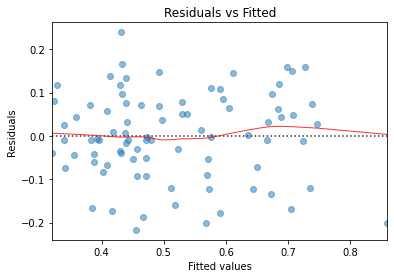

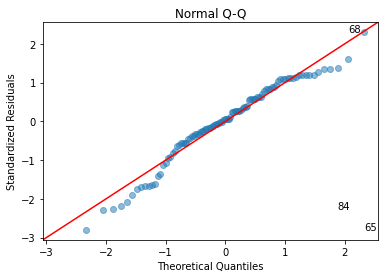

In [261]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y.head(85), dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [262]:
# how did the original candy brands perform?
df = sm.add_constant(df)
df['predicted_winpercent'] = model_fit.predict(df.drop(['competitorname','winpercent'], axis=1))

In [263]:
#compute the MSE:
from sklearn.metrics import mean_squared_error
print('Mean squared error: ', 100*mean_squared_error(df['winpercent'],df['predicted_winpercent']),'%')

Mean squared error:  1.0504013819470284 %


In [264]:
df.sort_values(by='winpercent', ascending=False).head(10)

,const,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,predicted_winpercent
52,1.0,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,0.841803,0.726794
51,1.0,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,0.818663,0.698856
79,1.0,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,0.816429,0.707044
28,1.0,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,0.767686,0.685158
64,1.0,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,0.766738,0.738978
53,1.0,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,0.734350,0.674984
36,1.0,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,0.730996,0.612272
54,1.0,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,0.728879,0.747531
32,1.0,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,0.714651,0.707405
42,1.0,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,0.707356,0.683621


Text(0, 0.5, 'prediction')

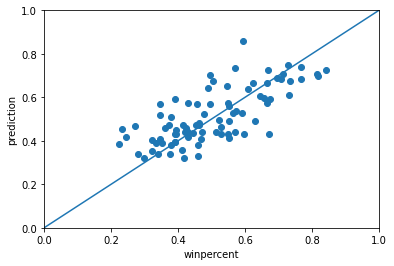

In [265]:
plt.scatter(df['winpercent'],df['predicted_winpercent'])
plt.xlim((0,1))
plt.ylim((0,1))
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))
plt.xlabel('winpercent')
plt.ylabel('prediction')

Heuristically (GridSearch) find the best setting:

In [266]:
def GrSr(parameters):
    df = pd.DataFrame(columns=parameters.keys())

    for y1 in parameters['chocolate']:
        for y2 in parameters['fruity']:
            for y3 in parameters['caramel']:
                for y4 in parameters['peanutyalmondy']:
                    for y5 in parameters['nougat']:
                        for y6 in parameters['crispedricewafer']:
                            for y7 in parameters['hard']:
                                for y8 in parameters['bar']:
                                    for y9 in parameters['pluribus']:
                                        for y10 in parameters['sugarpercent']:
                                            for y11 in parameters['pricepercent']:
                                                dict2 = {
                                                        'chocolate': y1,
                                                        'fruity': y2,
                                                        'caramel': y3,
                                                        'peanutyalmondy': y4,
                                                        'nougat': y5,
                                                        'crispedricewafer': y6,
                                                        'hard': y7,
                                                        'bar': y8,
                                                        'pluribus': y9,
                                                        'sugarpercent': y10,
                                                        'pricepercent': y11
                                                    }
                                                df=df.append(dict2, ignore_index = True)
    return df

In [267]:
parameters = {
    'chocolate': [1],
    'fruity': [1],
    'caramel': [1],
    'peanutyalmondy': [1],
    'nougat': [1],
    'crispedricewafer': [1],
    'hard': [0],
    'bar': [0],
    'pluribus': [0],
    'sugarpercent': np.linspace(0,1,100),
    'pricepercent': np.linspace(0,1,100)
}

In [268]:
out_df = GrSr(parameters)
out_df['const'] = 1


In [278]:
#sort the columns as needed for the model
cols = ['const', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent']
out_df = out_df[cols]

#create predictions and rescale
out_df['prediction_winpercent'] = model_fit.predict(out_df)
out_df['prediction_winpercent'] = out_df['prediction_winpercent'] / max(out_df['prediction_winpercent'] )

In [43]:
#save result
out_df.to_csv('out_df_final.csv')


In [ ]:
#load result
#out_df = pd.read_csv('out_df.csv')
#out_df=out_df.drop(['Unnamed: 0'], axis=1)
